# Introducing Pandas

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

We will start our code sessions with the standard NumPy and Pandas imports:

![image](https://lh3.googleusercontent.com/-hWtJzm7U4l8/XPdm8Te_bpI/AAAAAAAAdFE/xIfnVx8jD58FEb-NWfGiLWFeDWD3xnU8ACK8BGAs/s0/2019-06-04.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
a = ('NAmes',1,2,3,4)
Se= pd.Series(a)
Se

In [ ]:
li = list(range(10,20))
Se1 = pd.Series(li)
Se1

In [ ]:
dic = dict({'A':[1,2,3]})
pd.Series(dic)

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [7]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [8]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [9]:
data[1]

0.5

In [10]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [11]:
data[0:3:2]

0    0.25
2    0.75
dtype: float64

In [12]:
data.describe() # Descriptive Stast

count    4.000000
mean     0.625000
std      0.322749
min      0.250000
25%      0.437500
50%      0.625000
75%      0.812500
max      1.000000
dtype: float64

In [16]:
data.head()  # top Five Rows

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [17]:
data.tail() # to get last five rows

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [18]:
data.mean()

0.625

In [19]:
data.ndim

1

In [20]:
data.shape

(4,)

In [21]:
data.dtype

dtype('float64')

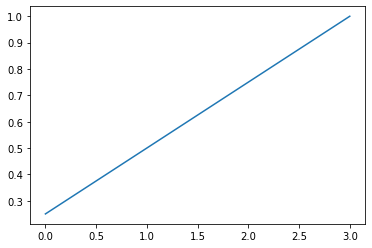

In [22]:
data.plot()

As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

### ``Series`` as generalized NumPy array

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.

This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [26]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And the item access works as expected:

In [27]:
data['b']

0.5

In [28]:
data[1]

0.5

We can even use non-contiguous or non-sequential indices:

In [29]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [32]:
data[5]

0.5

In [33]:
data[2]

0.25

In [34]:
Array = np.random.rand(20)
Array

array([0.04583584, 0.14135047, 0.27009145, 0.32871543, 0.89669877,
       0.7264962 , 0.11997413, 0.64136939, 0.59633319, 0.13552141,
       0.28159773, 0.83627547, 0.86364073, 0.95121644, 0.43817185,
       0.82487488, 0.25737361, 0.65307674, 0.99308988, 0.18308063])

In [35]:
Se = pd.Series(Array)
Se

0     0.045836
1     0.141350
2     0.270091
3     0.328715
4     0.896699
5     0.726496
6     0.119974
7     0.641369
8     0.596333
9     0.135521
10    0.281598
11    0.836275
12    0.863641
13    0.951216
14    0.438172
15    0.824875
16    0.257374
17    0.653077
18    0.993090
19    0.183081
dtype: float64

### Series as specialized dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [36]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [37]:
population.values

array([38332521, 26448193, 19651127, 19552860, 12882135], dtype=int64)

In [38]:
population.keys

<bound method Series.keys of California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64>

In [39]:
population.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [40]:
population.describe()

count    5.000000e+00
mean     2.337337e+07
std      9.640386e+06
min      1.288214e+07
25%      1.955286e+07
50%      1.965113e+07
75%      2.644819e+07
max      3.833252e+07
dtype: float64

In [41]:
population.tail()

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [42]:
population.head()

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [43]:
population.value_counts()

19651127    1
12882135    1
19552860    1
26448193    1
38332521    1
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [44]:
population['California']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [46]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [47]:
population[0]

38332521

We'll discuss some of the quirks of Pandas indexing and slicing in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Constructing Series objects

We've already seen a few ways of constructing a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [48]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [49]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [50]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

In [54]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[1,3])

1    b
3    c
dtype: object

Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [60]:
Ar = np.arange(12).reshape(4,3)
Ar

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [62]:
d = pd.DataFrame(Ar)
d

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [55]:
df = pd.DataFrame()
df

""


In [56]:
df['A']=[10,20,30]

In [57]:
df['Data'] = (1.5,2.5,3.5)

In [58]:
df

,A,Data
0,10,1.5
1,20,2.5
2,30,3.5


In [63]:
df.ndim

2

In [64]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [65]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [66]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [67]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [68]:
states.columns

Index(['population', 'area'], dtype='object')

In [69]:
states.keys()

Index(['population', 'area'], dtype='object')

In [70]:
states.shape

(5, 2)

In [71]:
states.ndim

2

In [72]:
states.describe()

,population,area
count,5.000000e+00,5.000000
mean,2.337337e+07,316246.600000
std,9.640386e+06,242437.411951
min,1.288214e+07,141297.000000
25%,1.955286e+07,149995.000000
50%,1.965113e+07,170312.000000
75%,2.644819e+07,423967.000000
max,3.833252e+07,695662.000000


In [73]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, California to Illinois
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   population  5 non-null      int64
 1   area        5 non-null      int64
dtypes: int64(2)
memory usage: 280.0+ bytes


In [74]:
states.head(2)

,population,area
California,38332521,423967
Texas,26448193,695662


In [75]:
states.tail(2)

,population,area
Florida,19552860,170312
Illinois,12882135,149995


Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### DataFrame as specialized dictionary

Similarly, we can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [77]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [79]:
states['area'][0]

423967

In [83]:
states['area'][1:3]

Texas       695662
New York    141297
Name: area, dtype: int64

Notice the potential point of confusion here: in a two-dimesnional NumPy array, ``data[0]`` will return the first *row*. For a ``DataFrame``, ``data['col0']`` will return the first *column*.
Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.
We'll explore more flexible means of indexing ``DataFrame``s in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Constructing DataFrame objects

A Pandas ``DataFrame`` can be constructed in a variety of ways.
Here we'll give several examples.

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [84]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### From a list comprehension of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [85]:
data = [{'a': i, 'b': 2 * i,'c':2**i+2 }
        for i in range(1,4)]
pd.DataFrame(data)

,a,b,c
0,1,2,4
1,2,4,6
2,3,6,10


Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [87]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [88]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [89]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.661284,0.741514
b,0.819551,0.598871
c,0.963357,0.734257


#### From a NumPy structured array

We covered structured arrays in  Numpy,
A Pandas ``DataFrame`` operates much like a structured array, and can be created directly from one:

In [94]:
A = np.zeros(5, dtype=[('A', 'i8'), ('B', 'c8')])
A

array([(0, 0.+0.j), (0, 0.+0.j), (0, 0.+0.j), (0, 0.+0.j), (0, 0.+0.j)],
      dtype=[('A', '<i8'), ('B', '<c8')])

In [95]:
pd.DataFrame(A)

,A,B
0,0,0.000000+0.000000j
1,0,0.000000+0.000000j
2,0,0.000000+0.000000j
3,0,0.000000+0.000000j
4,0,0.000000+0.000000j


## The Pandas Index Object

We have seen here that both the ``Series`` and ``DataFrame`` objects contain an explicit *index* that lets you reference and modify data.
This ``Index`` object is an interesting structure in itself, and it can be thought of either as an *immutable array* or as an *ordered set* (technically a multi-set, as ``Index`` objects may contain repeated values).
Those views have some interesting consequences in the operations available on ``Index`` objects.
As a simple example, let's construct an ``Index`` from a list of integers:

In [2]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

The ``Index`` in many ways operates like an array.

For example, we can use standard Python indexing notation to retrieve values or slices:

In [98]:
ind[1]

3

In [97]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [100]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

### Index as ordered set

Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic.
The ``Index`` object follows many of the conventions used by Python's built-in ``set`` data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [4]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [6]:
indA & indB  # intersection (Commen Elemeant in the Both the Sets)

Int64Index([3, 5, 7], dtype='int64')

In [8]:
indA | indB  # union(Combine all the elements)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [9]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

These operations may also be accessed via object methods, for example ``indA.intersection(indB)``.

#### Series and DataFrame to File Format

In [10]:
Se = pd.Series([10,20,30,40,50,60,40,25,60])
Se

0    10
1    20
2    30
3    40
4    50
5    60
6    40
7    25
8    60
dtype: int64

In [11]:
Data =Se.to_csv('Data.csv',sep=',',header=True)
Data

In [12]:
Se.to_frame('Datajson')

,Datajson
0,10
1,20
2,30
3,40
4,50
5,60
6,40
7,25
8,60


In [13]:
Df = pd.DataFrame({'Age':np.arange(25,30),
                  'Gender':['M','F','M','F','M'],
                  'Data_types':('int','Float','Complex','String','bool')
                  })
Df

,Age,Gender,Data_types
0,25,M,int
1,26,F,Float
2,27,M,Complex
3,28,F,String
4,29,M,bool


In [18]:
Df['Data_Structures']= ['list','tuple','dict','set','array'] # Col name and Values
Df

,Age,Gender,Data_types,Data_Structures,"(Age, Gender, Data_types, Data_Structures)"
0,25,M,int,list,30
1,26,F,Float,tuple,m
2,27,M,Complex,dict,None Type
3,28,F,String,set,None
4,29,M,bool,array,IEEE


In [15]:
Df.columns

Index(['Age', 'Gender', 'Data_types', 'Data_Structures'], dtype='object')

In [16]:
Df['Age', 'Gender', 'Data_types', 'Data_Structures'] = [30,'m','None Type','None','IEEE']  # Col names and Values to add the row

In [17]:
Df

,Age,Gender,Data_types,Data_Structures,"(Age, Gender, Data_types, Data_Structures)"
0,25,M,int,list,30
1,26,F,Float,tuple,m
2,27,M,Complex,dict,None Type
3,28,F,String,set,None
4,29,M,bool,array,IEEE


### Data Converting To files

In [19]:
Df.to_html('Df.html')

In [20]:
Df.to_csv('Df.csv')

<!--NAVIGATION-->
< [Introducing Pandas](DSPD0101-Introducing Pandas.ipynb) 
| [Contents](Index.ipynb) 
| [Visualization with Matplotlib](04.00-Introduction-To-Matplotlib.ipynb) 
>